In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Getting the data

In [8]:
df = pd.read_csv('/content/yellow_tripdata_2019-01.csv')

In [9]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


In [10]:
old_n = df.shape[0]

In [11]:
df.info(verbose=True,memory_usage='deep' ,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977407 entries, 0 to 977406
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               977407 non-null  int64  
 1   tpep_pickup_datetime   977407 non-null  object 
 2   tpep_dropoff_datetime  977407 non-null  object 
 3   passenger_count        977407 non-null  int64  
 4   trip_distance          977407 non-null  float64
 5   RatecodeID             977407 non-null  int64  
 6   store_and_fwd_flag     977407 non-null  object 
 7   PULocationID           977407 non-null  int64  
 8   DOLocationID           977407 non-null  int64  
 9   payment_type           977407 non-null  int64  
 10  fare_amount            977407 non-null  float64
 11  extra                  977407 non-null  float64
 12  mta_tax                977407 non-null  float64
 13  tip_amount             977407 non-null  float64
 14  tolls_amount           977406 non-nu

In [12]:
df.fillna(0, inplace=True)

In [13]:
df.info(verbose=True,memory_usage='deep' ,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977407 entries, 0 to 977406
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               977407 non-null  int64  
 1   tpep_pickup_datetime   977407 non-null  object 
 2   tpep_dropoff_datetime  977407 non-null  object 
 3   passenger_count        977407 non-null  int64  
 4   trip_distance          977407 non-null  float64
 5   RatecodeID             977407 non-null  int64  
 6   store_and_fwd_flag     977407 non-null  object 
 7   PULocationID           977407 non-null  int64  
 8   DOLocationID           977407 non-null  int64  
 9   payment_type           977407 non-null  int64  
 10  fare_amount            977407 non-null  float64
 11  extra                  977407 non-null  float64
 12  mta_tax                977407 non-null  float64
 13  tip_amount             977407 non-null  float64
 14  tolls_amount           977407 non-nu

In [14]:
df['pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
numerical_data=df.select_dtypes(include='number')
print(numerical_data.head())

   VendorID  passenger_count  trip_distance  RatecodeID  PULocationID  \
0         1                1            1.5           1           151   
1         1                1            2.6           1           239   
2         2                3            0.0           1           236   
3         2                5            0.0           1           193   
4         2                5            0.0           2           193   

   DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0           239             1          7.0    0.5      0.5        1.65   
1           246             1         14.0    0.5      0.5        1.00   
2           236             1          4.5    0.5      0.5        0.00   
3           193             2          3.5    0.5      0.5        0.00   
4           193             2         52.0    0.0      0.5        0.00   

   tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  
0           0.0                    0.3 

In [17]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_datetime,dropoff_datetime
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,0.0,2019-01-01 00:46:40,2019-01-01 00:53:20
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,0.0,2019-01-01 00:59:47,2019-01-01 01:18:59
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,0.0,2018-12-21 13:48:30,2018-12-21 13:52:40
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,0.0,2018-11-28 15:52:25,2018-11-28 15:55:45
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,0.0,2018-11-28 15:56:57,2018-11-28 15:58:33


In [18]:
df['payment_type'].unique()

df['payment_type'].value_counts()

,count
payment_type,
1,637756
2,333150
3,4730
4,1771


In [19]:
df['VendorID'].unique()

df['VendorID'].value_counts()

,count
VendorID,
2,596878
1,369141
4,11388


In [20]:
(df.describe())

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_datetime,dropoff_datetime
count,977407.000000,977407.000000,977407.00000,977407.000000,977407.000000,977407.000000,977407.000000,977407.000000,977407.000000,977407.000000,977407.000000,977407.000000,977407.000000,977407.000000,977407.0,977407,977407
mean,1.645629,1.614568,3.04117,1.067802,162.848560,160.840460,1.355965,12.697815,0.332015,0.496223,1.691694,0.348743,0.299240,15.869981,0.0,2019-01-03 10:24:18.571047936,2019-01-03 10:40:58.636731392
min,1.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,-300.000000,-4.500000,-0.500000,-7.550000,-21.000000,-0.300000,-300.300000,0.0,2003-01-01 00:05:12,2003-01-01 00:05:12
25%,1.000000,1.000000,0.96000,1.000000,114.000000,107.000000,1.000000,6.000000,0.000000,0.500000,0.000000,0.000000,0.300000,8.160000,0.0,2019-01-02 10:59:54.500000,2019-01-02 11:16:54
50%,2.000000,1.000000,1.60000,1.000000,161.000000,162.000000,1.000000,8.500000,0.000000,0.500000,1.200000,0.000000,0.300000,11.160000,0.0,2019-01-03 14:19:42,2019-01-03 14:35:37
75%,2.000000,2.000000,3.08000,1.000000,233.000000,233.000000,2.000000,13.500000,0.500000,0.500000,2.160000,0.000000,0.300000,16.560000,0.0,2019-01-04 15:38:30.500000,2019-01-04 15:55:29
max,4.000000,9.000000,128.73000,99.000000,265.000000,265.000000,4.000000,31107.910000,18.500000,0.500000,400.000000,576.470000,0.300000,31107.910000,0.0,2019-02-13 05:28:50,2019-02-13 12:52:04
std,0.546535,1.252078,4.00344,0.716497,66.861675,71.230565,0.499805,58.426590,0.497846,0.048865,2.544078,1.794162,0.020502,59.012023,0.0,NaN,NaN


In [21]:

def remove_negative_values(df, columns):
    for col in columns:
        df[col] = df[col].abs()
    return df

columns_to_check_negative = ["fare_amount", "tip_amount", "tolls_amount", "total_amount", "extra", "mta_tax","improvement_surcharge"]
data = remove_negative_values(df, columns_to_check_negative)


In [22]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_datetime,dropoff_datetime
count,977407.000000,977407.000000,977407.00000,977407.000000,977407.000000,977407.000000,977407.000000,977407.000000,977407.000000,977407.000000,977407.000000,977407.000000,977407.000000,977407.000000,977407.0,977407,977407
mean,1.645629,1.614568,3.04117,1.067802,162.848560,160.840460,1.355965,12.721376,0.332711,0.497250,1.691729,0.349051,0.299882,15.896233,0.0,2019-01-03 10:24:18.571047936,2019-01-03 10:40:58.636731392
min,1.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2003-01-01 00:05:12,2003-01-01 00:05:12
25%,1.000000,1.000000,0.96000,1.000000,114.000000,107.000000,1.000000,6.000000,0.000000,0.500000,0.000000,0.000000,0.300000,8.160000,0.0,2019-01-02 10:59:54.500000,2019-01-02 11:16:54
50%,2.000000,1.000000,1.60000,1.000000,161.000000,162.000000,1.000000,8.500000,0.000000,0.500000,1.200000,0.000000,0.300000,11.160000,0.0,2019-01-03 14:19:42,2019-01-03 14:35:37
75%,2.000000,2.000000,3.08000,1.000000,233.000000,233.000000,2.000000,13.500000,0.500000,0.500000,2.160000,0.000000,0.300000,16.560000,0.0,2019-01-04 15:38:30.500000,2019-01-04 15:55:29
max,4.000000,9.000000,128.73000,99.000000,265.000000,265.000000,4.000000,31107.910000,18.500000,0.500000,400.000000,576.470000,0.300000,31107.910000,0.0,2019-02-13 05:28:50,2019-02-13 12:52:04
std,0.546535,1.252078,4.00344,0.716497,66.861675,71.230565,0.499805,58.421465,0.497381,0.036976,2.544054,1.794102,0.005937,59.004956,0.0,NaN,NaN


In [23]:
df = df[df["pickup_datetime"] >= pd.to_datetime("2019-01-01 00:00:00")]
df = df[df["dropoff_datetime"] >= pd.to_datetime("2019-01-01 00:00:00")]

In [24]:
df.describe()


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_datetime,dropoff_datetime
count,977031.000000,977031.000000,977031.000000,977031.000000,977031.000000,977031.000000,977031.000000,977031.000000,977031.000000,977031.000000,977031.000000,977031.000000,977031.000000,977031.000000,977031.0,977031,977031
mean,1.645492,1.614389,3.041015,1.067786,162.854191,160.844279,1.355927,12.720114,0.332690,0.497253,1.691763,0.349049,0.299883,15.894962,0.0,2019-01-03 11:26:35.920787200,2019-01-03 11:43:11.341125632
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2019-01-01 00:00:00,2019-01-01 00:01:33
25%,1.000000,1.000000,0.960000,1.000000,114.000000,107.000000,1.000000,6.000000,0.000000,0.500000,0.000000,0.000000,0.300000,8.160000,0.0,2019-01-02 11:01:34.500000,2019-01-02 11:18:44.500000
50%,2.000000,1.000000,1.600000,1.000000,161.000000,162.000000,1.000000,8.500000,0.000000,0.500000,1.200000,0.000000,0.300000,11.160000,0.0,2019-01-03 14:20:37,2019-01-03 14:36:34
75%,2.000000,2.000000,3.080000,1.000000,233.000000,233.000000,2.000000,13.500000,0.500000,0.500000,2.160000,0.000000,0.300000,16.560000,0.0,2019-01-04 15:38:53,2019-01-04 15:55:54
max,4.000000,9.000000,128.730000,99.000000,265.000000,265.000000,4.000000,31107.910000,18.500000,0.500000,400.000000,576.470000,0.300000,31107.910000,0.0,2019-02-13 05:28:50,2019-02-13 12:52:04
std,0.546595,1.251862,4.003451,0.716540,66.859566,71.228845,0.499801,58.430067,0.497457,0.036956,2.543916,1.794121,0.005915,59.013482,0.0,NaN,NaN


In [25]:
def calculate_statistics(df, columns):
    stats = {}
    for col in columns:
        stats[col] = {
            "mean": df[col].mean(),
            "median": df[col].median(),
            "std": df[col].std()
        }
    return stats

# Calculate statistics for numerical columns
numerical_columns = ["fare_amount", "tip_amount", "tolls_amount", "total_amount", "trip_distance"]
statistics = calculate_statistics(df, numerical_columns)

# Display the statistics
for col, stats in statistics.items():
    print(f"Statistics for {col}: Mean={stats['mean']}, Median={stats['median']}, Std={stats['std']}")


Statistics for fare_amount: Mean=12.720114233837, Median=8.5, Std=58.430067035918235
Statistics for tip_amount: Mean=1.6917633524422468, Median=1.2, Std=2.5439160127730442
Statistics for tolls_amount: Mean=0.34904918062988805, Median=0.0, Std=1.7941212244572133
Statistics for total_amount: Mean=15.89496161329579, Median=11.16, Std=59.01348213461513
Statistics for trip_distance: Mean=3.041014901267208, Median=1.6, Std=4.00345053044411


In [26]:
df[df["fare_amount"] >= df["fare_amount"].quantile(0.9998) ].sort_values(by="fare_amount", ascending=False)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_datetime,dropoff_datetime
651591,1,2019-01-04 09:28:37,2019-01-04 09:28:37,0,0.00,99,N,264,264,1,31107.91,0.0,0.0,0.0,0.00,0.0,31107.91,0.0,2019-01-04 09:28:37,2019-01-04 09:28:37
737289,1,2019-01-04 16:08:10,2019-01-04 16:08:10,0,0.00,99,N,264,264,1,30130.71,0.0,0.0,0.0,0.00,0.0,30130.71,0.0,2019-01-04 16:08:10,2019-01-04 16:08:10
301097,1,2019-01-02 16:06:14,2019-01-02 16:06:14,0,0.00,99,N,264,264,1,25356.38,0.0,0.0,0.0,0.00,0.0,25356.38,0.0,2019-01-02 16:06:14,2019-01-02 16:06:14
233844,1,2019-01-02 10:06:08,2019-01-02 10:06:08,0,0.00,99,N,264,264,1,18477.08,0.0,0.0,0.0,0.00,0.0,18477.08,0.0,2019-01-02 10:06:08,2019-01-02 10:06:08
233845,1,2019-01-02 10:06:56,2019-01-02 10:06:56,0,0.00,99,N,264,264,1,17242.81,0.0,0.0,0.0,0.00,0.0,17242.81,0.0,2019-01-02 10:06:56,2019-01-02 10:06:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703629,1,2019-01-04 13:46:04,2019-01-04 14:38:04,1,38.50,5,N,265,138,1,160.00,0.0,0.0,5.0,16.26,0.3,181.56,0.0,2019-01-04 13:46:04,2019-01-04 14:38:04
774062,2,2019-01-04 18:38:49,2019-01-04 19:23:19,1,35.15,5,N,124,265,1,160.00,0.0,0.0,12.0,28.02,0.3,200.32,0.0,2019-01-04 18:38:49,2019-01-04 19:23:19
839675,1,2019-01-04 23:18:14,2019-01-04 23:19:11,3,0.00,5,N,265,265,1,160.00,0.0,0.0,10.0,5.76,0.3,176.06,0.0,2019-01-04 23:18:14,2019-01-04 23:19:11
904991,2,2019-01-05 10:51:29,2019-01-05 11:50:47,1,36.52,5,N,48,265,2,160.00,0.0,0.0,0.0,10.50,0.3,170.80,0.0,2019-01-05 10:51:29,2019-01-05 11:50:47


In [27]:
df = df[(df["fare_amount"] <=300) & (df["trip_distance"] >0)]

In [28]:
df = df.drop(columns=["store_and_fwd_flag","tpep_pickup_datetime","tpep_dropoff_datetime","mta_tax","improvement_surcharge"])

In [29]:
df['pick_hr'] = df['pickup_datetime'].dt.hour
df['pick_day'] = df['pickup_datetime'].dt.day
df['drop_hr'] = df['dropoff_datetime'].dt.hour
df['drop_day'] = df['dropoff_datetime'].dt.day
df['trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 60
df['pick_weekday'] = df['pickup_datetime'].dt.weekday
df['drop_weekday'] = df['dropoff_datetime'].dt.weekday

In [30]:
df = df[df["fare_amount"] > 2.5]

In [31]:
df.sort_values(by="trip_duration" , ascending=False)

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,...,congestion_surcharge,pickup_datetime,dropoff_datetime,pick_hr,pick_day,drop_hr,drop_day,trip_duration,pick_weekday,drop_weekday
68268,1,1,1.20,1,48,163,2,6.50,0.0,0.00,...,0.0,2019-01-01 07:01:20,2019-01-31 14:29:21,7,1,14,31,43648.016667,1,3
592225,1,1,1.10,1,50,170,1,8.50,0.0,1.85,...,0.0,2019-01-03 22:24:36,2019-01-27 10:41:17,22,3,10,27,33856.683333,3,6
875806,1,2,3.90,1,114,237,1,16.50,0.5,3.55,...,0.0,2019-01-05 04:21:40,2019-01-27 01:53:46,4,5,1,27,31532.100000,5,6
688822,2,1,2.37,1,211,12,2,11.00,0.0,0.00,...,0.0,2019-01-04 12:10:03,2019-01-05 12:09:56,12,4,12,5,1439.883333,4,5
350074,2,2,22.47,1,132,6,1,59.00,1.0,10.85,...,0.0,2019-01-02 19:21:34,2019-01-03 19:21:20,19,2,19,3,1439.766667,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567238,1,1,11.80,1,239,20,2,33.00,1.0,0.00,...,0.0,2019-01-03 20:05:54,2019-01-03 20:05:54,20,3,20,3,0.000000,3,3
617352,1,1,4.00,1,229,229,1,13.50,0.5,2.95,...,0.0,2019-01-04 01:42:58,2019-01-04 01:42:58,1,4,1,4,0.000000,4,4
402203,1,1,18.60,2,264,114,1,69.46,0.0,0.00,...,0.0,2019-01-03 06:25:18,2019-01-03 06:25:18,6,3,6,3,0.000000,3,3
546024,1,1,19.60,2,231,132,1,70.80,0.0,0.00,...,0.0,2019-01-03 18:23:45,2019-01-03 18:23:45,18,3,18,3,0.000000,3,3


In [32]:
df["trip_speed"] = df['trip_distance'] / (df['trip_duration'] / 60)

In [33]:
df = df[(df["trip_speed"] > 0) & (~np.isinf(df["trip_speed"]))]

In [34]:
df[df["trip_speed"] >= df["trip_speed"].quantile(0.9973) ].sort_values(by="trip_speed", ascending=False)

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,...,pickup_datetime,dropoff_datetime,pick_hr,pick_day,drop_hr,drop_day,trip_duration,pick_weekday,drop_weekday,trip_speed
375797,1,3,17.80,3,132,132,3,20.0,0.5,0.00,...,2019-01-02 22:57:36,2019-01-02 22:57:38,22,2,22,2,0.033333,2,2,32040.000000
316755,1,1,15.30,1,179,179,1,44.5,1.0,0.00,...,2019-01-02 17:24:20,2019-01-02 17:24:23,17,2,17,2,0.050000,2,2,18360.000000
60812,1,1,9.60,2,265,265,2,52.0,0.0,0.00,...,2019-01-01 05:27:16,2019-01-01 05:27:18,5,1,5,1,0.033333,1,1,17280.000000
621985,1,1,8.80,1,261,261,1,30.5,0.5,5.00,...,2019-01-04 04:41:27,2019-01-04 04:41:29,4,4,4,4,0.033333,4,4,15840.000000
573846,1,1,8.50,3,132,132,3,20.0,0.5,0.00,...,2019-01-03 20:30:30,2019-01-03 20:30:32,20,3,20,3,0.033333,3,3,15300.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190691,1,1,19.20,2,132,262,1,52.0,0.0,14.60,...,2019-01-02 00:50:51,2019-01-02 01:17:16,0,2,1,2,26.416667,2,2,43.608833
448112,1,1,26.20,5,132,265,1,152.0,0.0,31.60,...,2019-01-03 10:12:39,2019-01-03 10:48:42,10,3,10,3,36.050000,3,3,43.606103
840149,2,2,20.41,2,132,87,1,52.0,0.0,7.00,...,2019-01-04 23:19:02,2019-01-04 23:47:07,23,4,23,4,28.083333,4,4,43.605935
603439,2,1,15.14,1,132,15,1,40.5,0.5,8.36,...,2019-01-03 23:02:14,2019-01-03 23:23:04,23,3,23,3,20.833333,3,3,43.603200


In [35]:
data['passenger_count'].unique()

array([1, 3, 5, 2, 4, 0, 6, 8, 7, 9])

/tmp/ipython-input-2268236638.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="passenger_count", palette="colorblind")


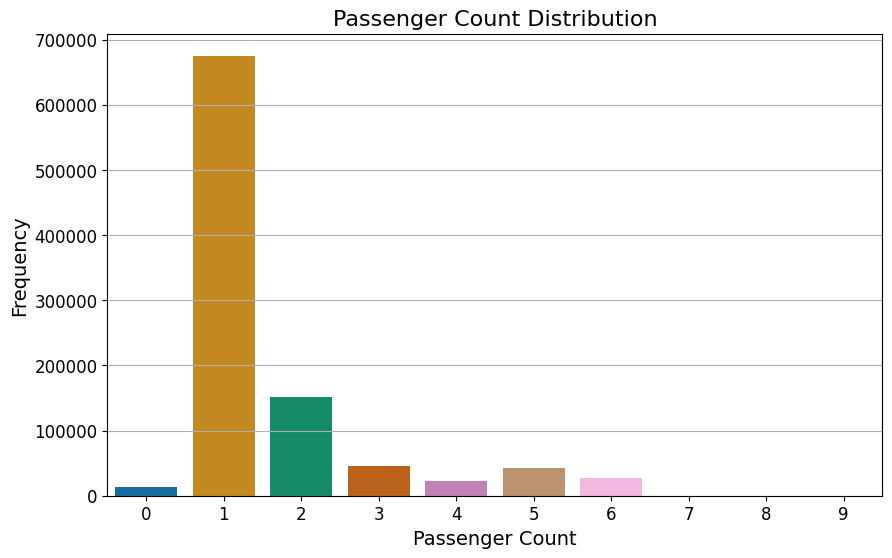

Data cleaning complete.


In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="passenger_count", palette="colorblind")
plt.title("Passenger Count Distribution", fontsize=16)
plt.xlabel("Passenger Count", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", alpha=1)
plt.show()
# Save the cleaned dataset
# data.to_csv("cleaned_data.csv", index=False)

print("Data cleaning complete.")


In [37]:
data[data['trip_distance'] > data['trip_distance'].quantile(0.90)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_datetime,dropoff_datetime
12,1,2019-01-01 00:45:21,2019-01-01 01:31:05,1,8.70,1,N,163,25,1,34.50,0.5,0.5,7.15,0.00,0.3,42.95,0.0,2019-01-01 00:45:21,2019-01-01 01:31:05
23,1,2019-01-01 00:19:55,2019-01-01 00:57:56,1,12.30,1,N,138,50,1,38.00,0.5,0.5,4.00,5.76,0.3,49.06,0.0,2019-01-01 00:19:55,2019-01-01 00:57:56
33,2,2019-01-01 00:08:20,2019-01-01 00:41:51,2,19.13,2,N,132,238,1,52.00,0.0,0.5,11.71,5.76,0.3,70.27,0.0,2019-01-01 00:08:20,2019-01-01 00:41:51
36,1,2019-01-01 00:41:07,2019-01-01 01:51:53,1,11.20,1,N,141,83,2,46.50,0.5,0.5,0.00,0.00,0.3,47.80,0.0,2019-01-01 00:41:07,2019-01-01 01:51:53
46,1,2019-01-01 00:57:32,2019-01-01 01:18:34,1,8.00,1,N,140,243,2,24.50,0.5,0.5,0.00,0.00,0.3,25.80,0.0,2019-01-01 00:57:32,2019-01-01 01:18:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977333,2,2019-01-05 15:21:44,2019-01-05 16:14:37,1,19.24,2,N,230,132,2,52.00,0.0,0.5,0.00,5.76,0.3,58.56,0.0,2019-01-05 15:21:44,2019-01-05 16:14:37
977363,2,2019-01-05 15:02:42,2019-01-05 15:50:34,1,15.35,5,N,147,244,1,38.13,0.0,0.5,0.00,5.76,0.3,44.69,0.0,2019-01-05 15:02:42,2019-01-05 15:50:34
977367,2,2019-01-05 15:29:14,2019-01-05 15:57:07,1,12.19,1,N,100,138,1,34.50,0.0,0.5,8.21,5.76,0.3,49.27,0.0,2019-01-05 15:29:14,2019-01-05 15:57:07
977388,1,2019-01-05 15:09:51,2019-01-05 15:34:51,1,11.00,1,N,264,264,2,32.50,0.0,0.5,0.00,5.76,0.3,39.06,0.0,2019-01-05 15:09:51,2019-01-05 15:34:51


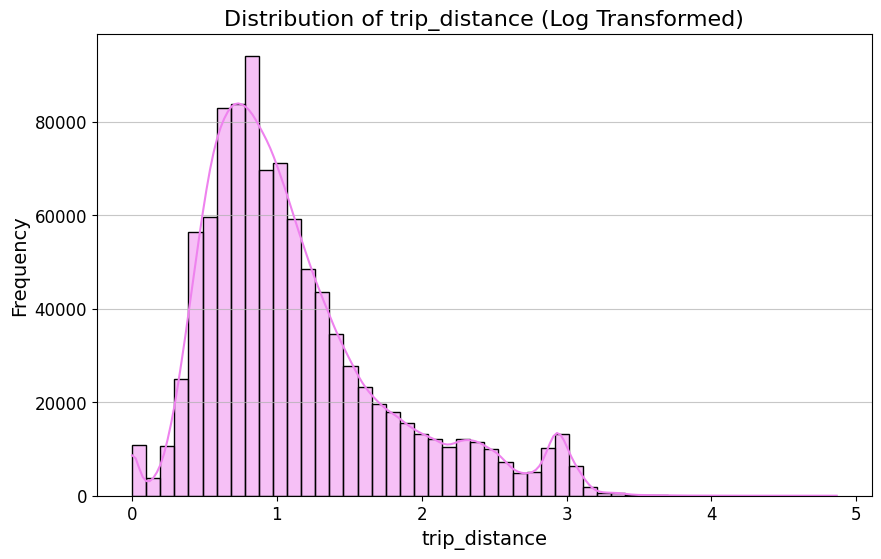

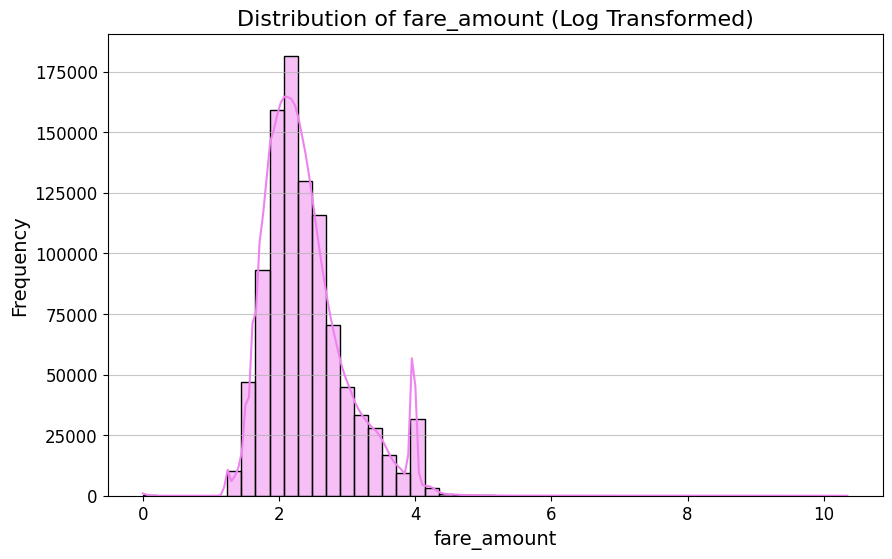

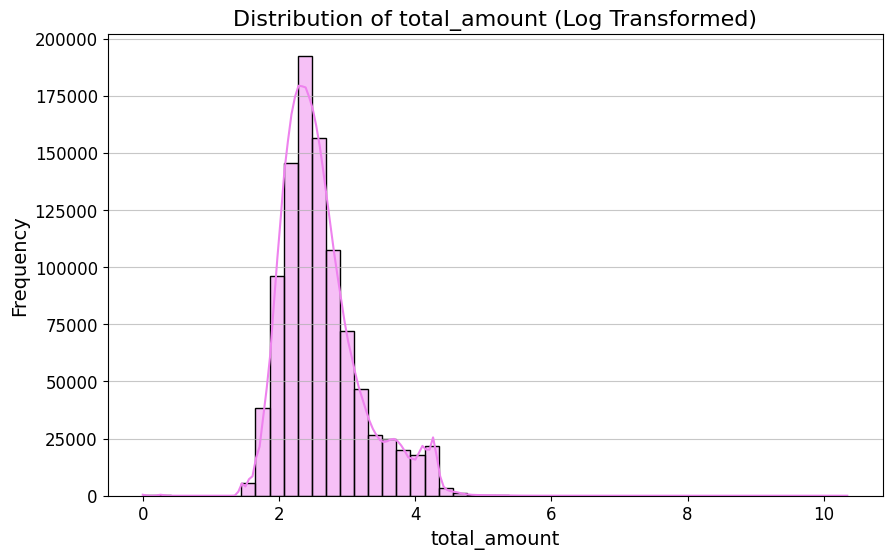

Data cleaning complete.


In [38]:
Histogram_plot = ["trip_distance", "fare_amount", "total_amount"]

for col in Histogram_plot:
    log_data = np.log1p(data[col])
    plt.figure(figsize=(10, 6))
    sns.histplot(log_data, kde=True, bins=50, color="Violet")
    plt.title(f"Distribution of {col} (Log Transformed)", fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis="y", alpha=0.7)
    plt.show()

# Save the cleaned dataset
# data.to_csv("cleaned_data.csv", index=False)

print("Data cleaning complete.")


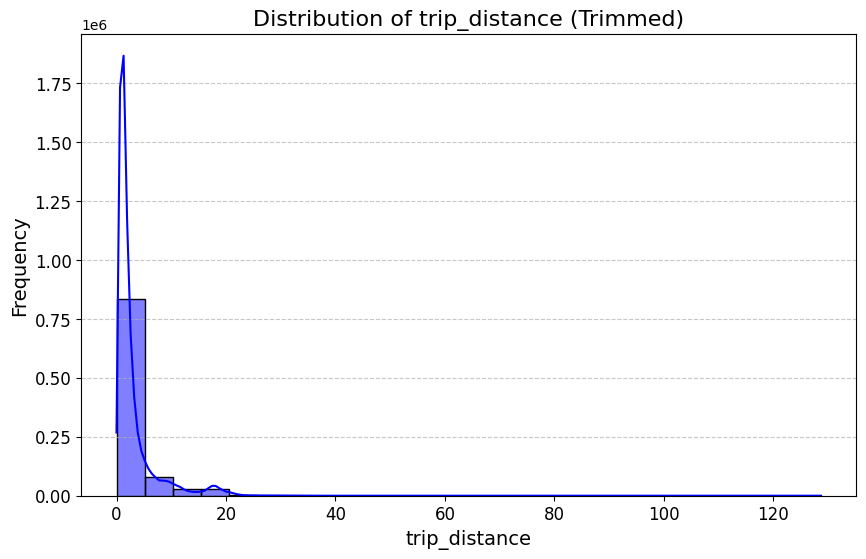

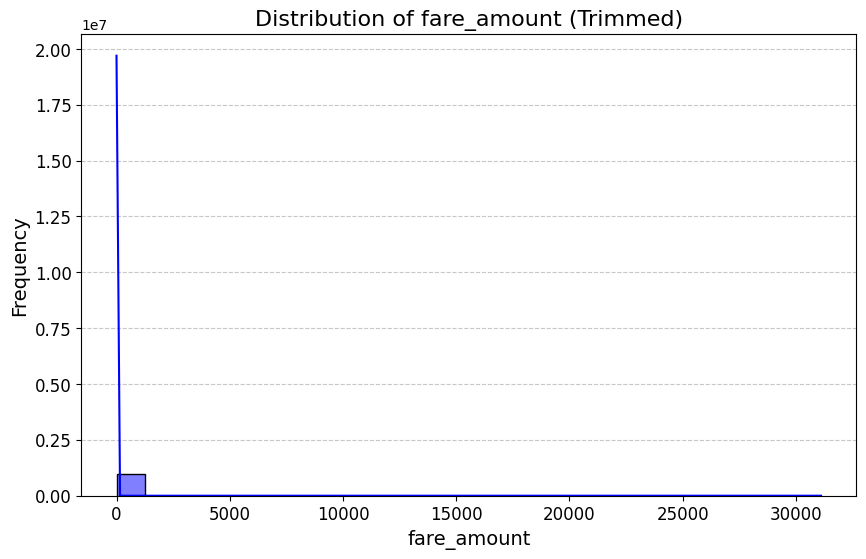

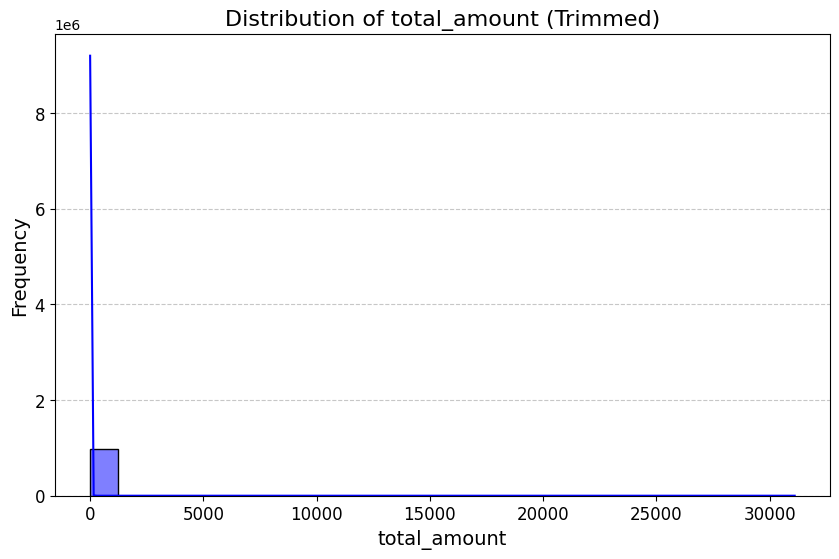

In [39]:
Histogram_plot = ["trip_distance", "fare_amount", "total_amount"]

for col in Histogram_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True, bins=25, color="blue")
    plt.title(f"Distribution of {col} (Trimmed)", fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

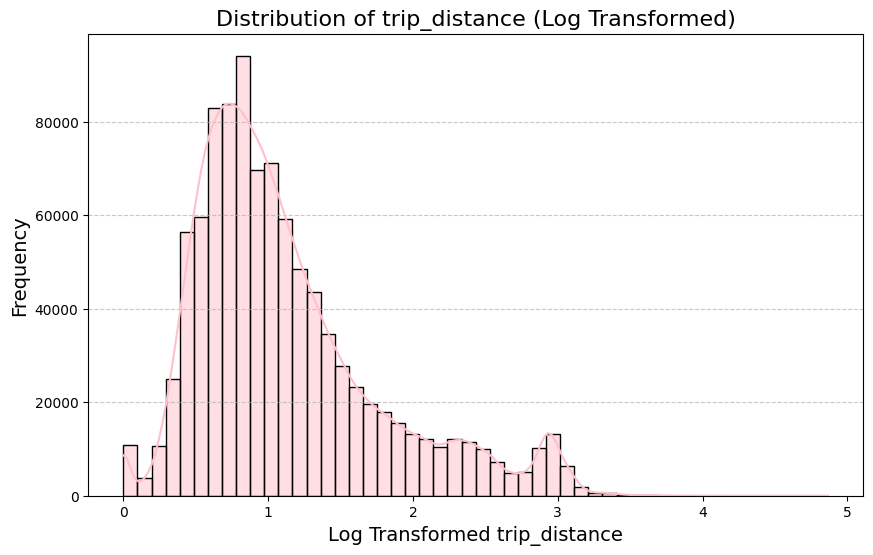

In [40]:
data['log_trip_distance'] = np.log1p(data['trip_distance'])

plt.figure(figsize=(10, 6))
sns.histplot(data['log_trip_distance'], kde=True, bins=50, color="pink")
plt.title("Distribution of trip_distance (Log Transformed)", fontsize=16)
plt.xlabel("Log Transformed trip_distance", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [41]:
# Find the minimum and maximum values for trip_distance
min_trip_distance = data['trip_distance'].min()
max_trip_distance = data['trip_distance'].max()

print(f"Minimum trip_distance: {min_trip_distance}")
print(f"Maximum trip_distance: {max_trip_distance}")


Minimum trip_distance: 0.0
Maximum trip_distance: 128.73


In [44]:
df.head()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,...,pickup_datetime,dropoff_datetime,pick_hr,pick_day,drop_hr,drop_day,trip_duration,pick_weekday,drop_weekday,trip_speed
0,1,1,1.5,1,151,239,1,7.0,0.5,1.65,...,2019-01-01 00:46:40,2019-01-01 00:53:20,0,1,0,1,6.666667,1,1,13.500000
1,1,1,2.6,1,239,246,1,14.0,0.5,1.00,...,2019-01-01 00:59:47,2019-01-01 01:18:59,0,1,1,1,19.200000,1,1,8.125000
7,1,1,1.3,1,163,229,1,6.5,0.5,1.25,...,2019-01-01 00:21:28,2019-01-01 00:28:37,0,1,0,1,7.150000,1,1,10.909091
8,1,1,3.7,1,229,7,1,13.5,0.5,3.70,...,2019-01-01 00:32:01,2019-01-01 00:45:39,0,1,0,1,13.633333,1,1,16.283619
9,1,2,2.1,1,141,234,1,10.0,0.5,1.70,...,2019-01-01 00:57:32,2019-01-01 01:09:32,0,1,1,1,12.000000,1,1,10.500000


In [45]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_datetime,dropoff_datetime,log_trip_distance
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,...,0.5,0.5,1.65,0.0,0.3,9.95,0.0,2019-01-01 00:46:40,2019-01-01 00:53:20,0.916291
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,...,0.5,0.5,1.00,0.0,0.3,16.30,0.0,2019-01-01 00:59:47,2019-01-01 01:18:59,1.280934
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,...,0.5,0.5,0.00,0.0,0.3,5.80,0.0,2018-12-21 13:48:30,2018-12-21 13:52:40,0.000000
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,...,0.5,0.5,0.00,0.0,0.3,7.55,0.0,2018-11-28 15:52:25,2018-11-28 15:55:45,0.000000
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,...,0.0,0.5,0.00,0.0,0.3,55.55,0.0,2018-11-28 15:56:57,2018-11-28 15:58:33,0.000000


In [46]:
data=data[
    ['tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count','trip_distance',
     'RatecodeID','PULocationID','DOLocationID','payment_type','total_amount']
    ]

In [47]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

In [48]:
data['transaction_date'] = pd.to_datetime(data['tpep_pickup_datetime'].dt.date)
data['transaction_year'] = data['tpep_pickup_datetime'].dt.year
data['transaction_month'] = data['tpep_pickup_datetime'].dt.month
data['transaction_day'] = data['tpep_pickup_datetime'].dt.day
data['transaction_hour'] = data['tpep_pickup_datetime'].dt.hour

In [49]:
df.head()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,...,pickup_datetime,dropoff_datetime,pick_hr,pick_day,drop_hr,drop_day,trip_duration,pick_weekday,drop_weekday,trip_speed
0,1,1,1.5,1,151,239,1,7.0,0.5,1.65,...,2019-01-01 00:46:40,2019-01-01 00:53:20,0,1,0,1,6.666667,1,1,13.500000
1,1,1,2.6,1,239,246,1,14.0,0.5,1.00,...,2019-01-01 00:59:47,2019-01-01 01:18:59,0,1,1,1,19.200000,1,1,8.125000
7,1,1,1.3,1,163,229,1,6.5,0.5,1.25,...,2019-01-01 00:21:28,2019-01-01 00:28:37,0,1,0,1,7.150000,1,1,10.909091
8,1,1,3.7,1,229,7,1,13.5,0.5,3.70,...,2019-01-01 00:32:01,2019-01-01 00:45:39,0,1,0,1,13.633333,1,1,16.283619
9,1,2,2.1,1,141,234,1,10.0,0.5,1.70,...,2019-01-01 00:57:32,2019-01-01 01:09:32,0,1,1,1,12.000000,1,1,10.500000


In [53]:
nyc_weather = pd.read_csv("/content/nyc_weather.csv")

In [54]:
nyc_weather.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,31.12.2019 22:00,6.1,65,6,100%.,0.3
1,31.12.2019 19:00,6.7,71,5,70 – 80%.,NaN
2,31.12.2019 16:00,7.2,66,5,50%.,NaN
3,31.12.2019 13:00,6.1,76,3,100%.,Trace of precipitation
4,31.12.2019 10:00,4.4,83,2,100%.,Trace of precipitation


In [55]:
nyc_weather['cloud cover'].value_counts()

,count
cloud cover,
70 – 80%.,973
100%.,896
20–30%.,479
50%.,413
no clouds,168
Sky obscured by fog and/or other meteorological phenomena.,3


In [56]:
nyc_weather['amount of precipitation'].value_counts()

,count
amount of precipitation,
Trace of precipitation,266
0.3,61
2.0,49
1.0,45
0.8,42
0.5,42
4.0,33
5.0,24
3.0,23


In [57]:
nyc_weather.isna().sum()

,0
date and time,0
temperature,0
humidity,0
wind speed,0
cloud cover,4
amount of precipitation,2240


In [58]:
nyc_weather['amount of precipitation'] = nyc_weather['amount of precipitation'].replace('Trace of precipitation', 0.1)
nyc_weather['amount of precipitation'] = nyc_weather['amount of precipitation'].astype(float)
nyc_weather['amount of precipitation'].interpolate(inplace=True)

/tmp/ipython-input-3414773980.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nyc_weather['amount of precipitation'].interpolate(inplace=True)


In [59]:
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('70 – 80%.', 0.7)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('100%.', 1)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('20–30%.', 0.3)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('50%.', 0.5)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('no clouds', 0)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('Sky obscured by fog and/or other meteorological phenomena.', 1)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].astype(float)
nyc_weather['cloud cover'].interpolate(inplace=True)

/tmp/ipython-input-4034767346.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('Sky obscured by fog and/or other meteorological phenomena.', 1)
/tmp/ipython-input-4034767346.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nyc_wea

In [60]:
nyc_weather['date and time'] = pd.to_datetime(nyc_weather['date and time'])

/tmp/ipython-input-3776574042.py:1: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  nyc_weather['date and time'] = pd.to_datetime(nyc_weather['date and time'])


In [61]:
nyc_weather.dtypes

,0
date and time,datetime64[ns]
temperature,float64
humidity,int64
wind speed,int64
cloud cover,float64
amount of precipitation,float64


In [62]:

nyc_weather['hour'] = nyc_weather['date and time'].dt.hour
nyc_weather['month'] = nyc_weather['date and time'].dt.month
nyc_weather['day'] = nyc_weather['date and time'].dt.day

In [64]:
nyc_taxi_with_weather = data.merge(nyc_weather, left_on = ['transaction_month','transaction_day','transaction_hour'], right_on = ['month','day','hour'], how='left')

print(nyc_taxi_with_weather.shape)
nyc_taxi_with_weather.head()

(977407, 23)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,...,transaction_hour,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,hour,month,day
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95,2019-01-01,...,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30,2019-01-01,...,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80,2018-12-21,...,13,2019-12-21 13:00:00,-0.6,59.0,2.0,0.7,0.1,13.0,12.0,21.0
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55,2018-11-28,...,15,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55,2018-11-28,...,15,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
nyc_taxi_with_weather = nyc_taxi_with_weather.drop(['date and time','hour','month','day'], axis=1)

In [66]:
nyc_taxi_with_weather.isna().sum()


,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
PULocationID,0
DOLocationID,0
payment_type,0
total_amount,0
transaction_date,0


In [67]:
nyc_taxi_with_weather = nyc_taxi_with_weather.sort_values(['transaction_date','transaction_hour']).reset_index().drop('index',axis=1)

In [68]:
nyc_taxi_with_weather = nyc_taxi_with_weather.interpolate(method='pad')

/tmp/ipython-input-329465988.py:1: FutureWarning: DataFrame.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nyc_taxi_with_weather = nyc_taxi_with_weather.interpolate(method='pad')


In [69]:
nyc_taxi_with_weather = nyc_taxi_with_weather.fillna(method='bfill')
nyc_taxi_with_weather.isna().sum()

/tmp/ipython-input-4170433930.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nyc_taxi_with_weather = nyc_taxi_with_weather.fillna(method='bfill')


,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
PULocationID,0
DOLocationID,0
payment_type,0
total_amount,0
transaction_date,0


In [70]:
nyc_taxi_with_weather.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,2003-01-01 00:05:12,2003-01-01 00:05:12,1,0.00,1,264,193,2,0.00,2003-01-01,2003,1,1,0,8.3,52.0,12.0,0.3,0.262963
1,2003-01-01 00:15:01,2003-01-01 00:15:05,6,0.00,1,264,193,2,0.00,2003-01-01,2003,1,1,0,8.3,52.0,12.0,0.3,0.262963
2,2008-12-31 23:22:32,2009-01-01 00:06:39,1,20.67,2,132,239,2,58.56,2008-12-31,2008,12,31,23,8.3,52.0,12.0,0.3,0.262963
3,2008-12-31 23:22:42,2008-12-31 23:34:33,6,1.43,1,140,162,2,8.30,2008-12-31,2008,12,31,23,8.3,52.0,12.0,0.3,0.262963
4,2008-12-31 23:41:30,2009-01-01 00:12:00,6,4.64,1,233,141,2,23.30,2008-12-31,2008,12,31,23,8.3,52.0,12.0,0.3,0.262963


/tmp/ipython-input-1699929331.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="temperature", y="total_amount", data=data, ci=None)


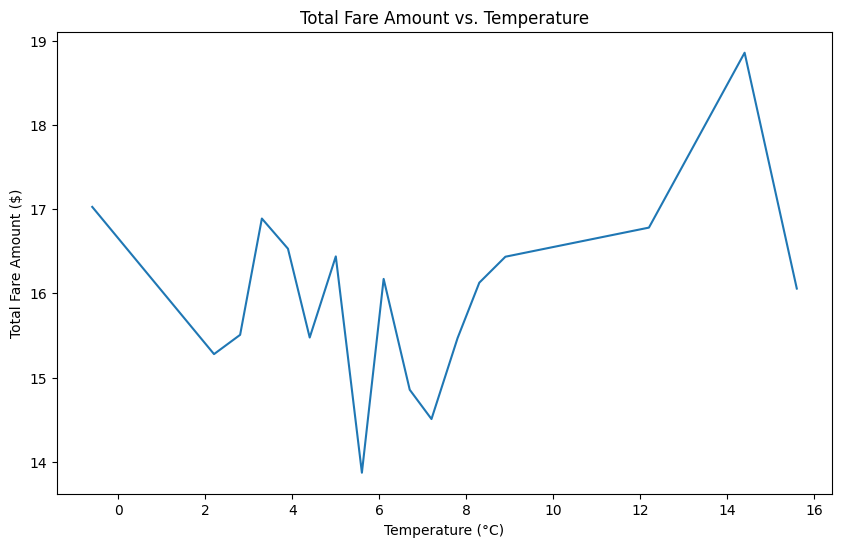

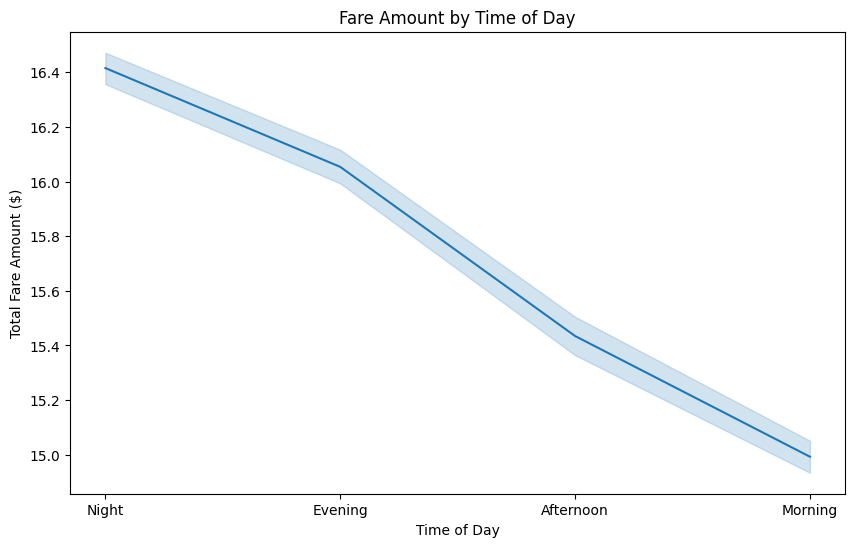

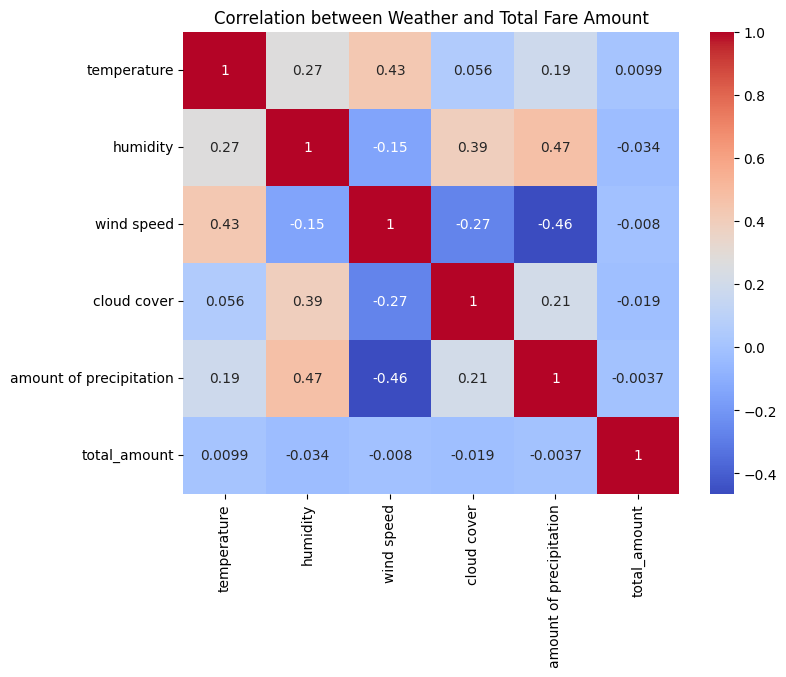

/tmp/ipython-input-1699929331.py:57: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_fare = data.groupby('temp_range')['total_amount'].mean().reset_index()
/tmp/ipython-input-1699929331.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='temp_range', y='total_amount', data=temp_fare, palette='viridis')


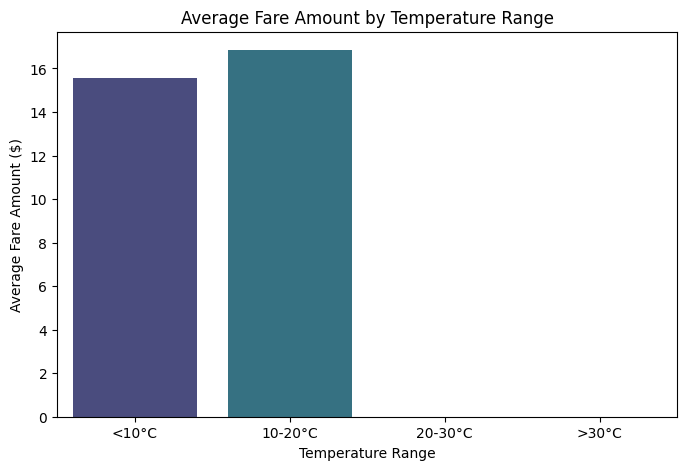

In [71]:
data=nyc_taxi_with_weather
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])
data['transaction_date'] = pd.to_datetime(data['transaction_date'])

# Derive new columns
data['trip_duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 60
data['fare_per_mile'] = np.where(data['trip_distance'] > 0, data['total_amount'] / data['trip_distance'], np.nan)

# Filter invalid rows
data = data[(data['trip_distance'] > 0) & (data['total_amount'] > 0)]
data = data[data['trip_duration'] > 0]  # Remove trips with non-positive duration

# Handle weather outliers (e.g., unrealistic temperature or humidity)
data = data[(data['temperature'] >= -30) & (data['temperature'] <= 50)]
data = data[(data['humidity'] >= 0) & (data['humidity'] <= 100)]

# Categorize transaction hour into periods of the day
def categorize_hour(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

data['time_period'] = data['transaction_hour'].apply(categorize_hour)

# Visualizations
plt.figure(figsize=(10, 6))
sns.lineplot(x="temperature", y="total_amount", data=data, ci=None)
plt.title("Total Fare Amount vs. Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Total Fare Amount ($)")
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x="time_period", y="total_amount", data=data)
plt.title("Fare Amount by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Total Fare Amount ($)")
plt.show()

# Correlation Heatmap
weather_cols = ['temperature', 'humidity', 'wind speed', 'cloud cover', 'amount of precipitation']
correlation = data[weather_cols + ['total_amount']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation between Weather and Total Fare Amount")
plt.show()

# Additional analyses
# Aggregating average fare by temperature ranges
data['temp_range'] = pd.cut(data['temperature'], bins=[-30, 10, 20, 30, 50], labels=["<10°C", "10-20°C", "20-30°C", ">30°C"])
temp_fare = data.groupby('temp_range')['total_amount'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='temp_range', y='total_amount', data=temp_fare, palette='viridis')
plt.title("Average Fare Amount by Temperature Range")
plt.xlabel("Temperature Range")
plt.ylabel("Average Fare Amount ($)")
plt.show()

In [72]:
data.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,...,transaction_month,transaction_day,transaction_hour,temperature,humidity,wind speed,cloud cover,amount of precipitation,trip_duration,fare_per_mile
count,969633,969633,969633.000000,969633.000000,969633.000000,969633.000000,969633.000000,969633.000000,969633.000000,969633,...,969633.000000,969633.000000,969633.000000,969633.000000,969633.000000,969633.000000,969633.000000,969633.000000,969633.000000,969633.000000
mean,2019-01-03 10:43:44.447239680,2019-01-03 11:00:30.769065472,1.616250,3.065330,1.056670,162.779899,160.775339,1.353063,15.672803,2019-01-02 21:24:05.486694400,...,1.003994,2.933083,12.824810,6.233792,63.531280,5.349892,0.868055,3.070302,16.772030,9.478644
min,2008-12-31 23:02:39,2008-12-31 23:34:33,0.000000,0.010000,1.000000,1.000000,1.000000,1.000000,0.300000,2008-12-31 00:00:00,...,1.000000,1.000000,0.000000,-0.600000,47.000000,0.000000,0.000000,0.100000,0.016667,0.006843
25%,2019-01-02 11:02:18,2019-01-02 11:19:28,1.000000,0.980000,1.000000,114.000000,107.000000,1.000000,8.160000,2019-01-02 00:00:00,...,1.000000,2.000000,9.000000,3.900000,52.000000,3.000000,0.700000,0.300000,5.950000,5.025641
50%,2019-01-03 14:21:41,2019-01-03 14:37:46,1.000000,1.620000,1.000000,161.000000,162.000000,1.000000,11.160000,2019-01-03 00:00:00,...,1.000000,3.000000,13.000000,6.700000,57.000000,5.000000,1.000000,1.000000,9.850000,6.633333
75%,2019-01-04 15:39:36,2019-01-04 15:56:46,2.000000,3.100000,1.000000,233.000000,233.000000,2.000000,16.560000,2019-01-04 00:00:00,...,1.000000,4.000000,18.000000,7.800000,68.000000,7.000000,1.000000,4.000000,16.016667,8.705357
max,2019-02-13 05:28:50,2019-02-13 12:52:04,8.000000,128.730000,99.000000,265.000000,265.000000,4.000000,6667.450000,2019-02-13 00:00:00,...,12.000000,31.000000,23.000000,15.600000,97.000000,12.000000,1.000000,29.000000,43648.016667,66674.500000
std,NaN,NaN,1.253581,4.009946,0.543488,66.799871,71.198754,0.496138,15.602165,NaN,...,0.209550,1.427173,6.167175,2.883739,15.317952,2.622749,0.192120,5.639876,100.428842,112.879140


/tmp/ipython-input-2255373816.py:38: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="temperature", y="total_amount", data=data, ci=None)


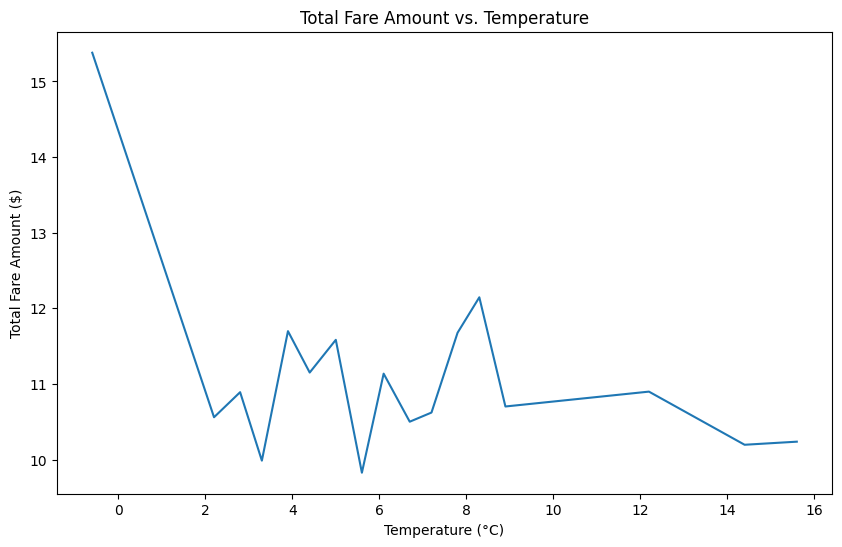

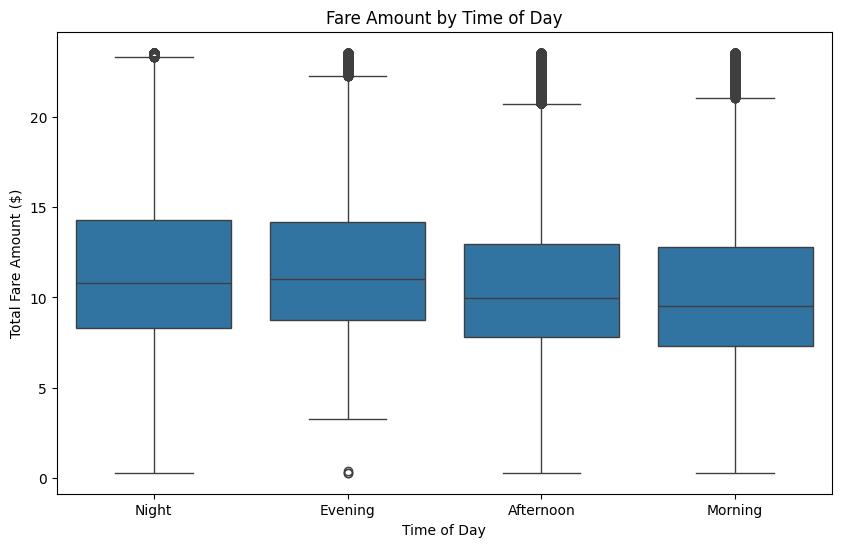

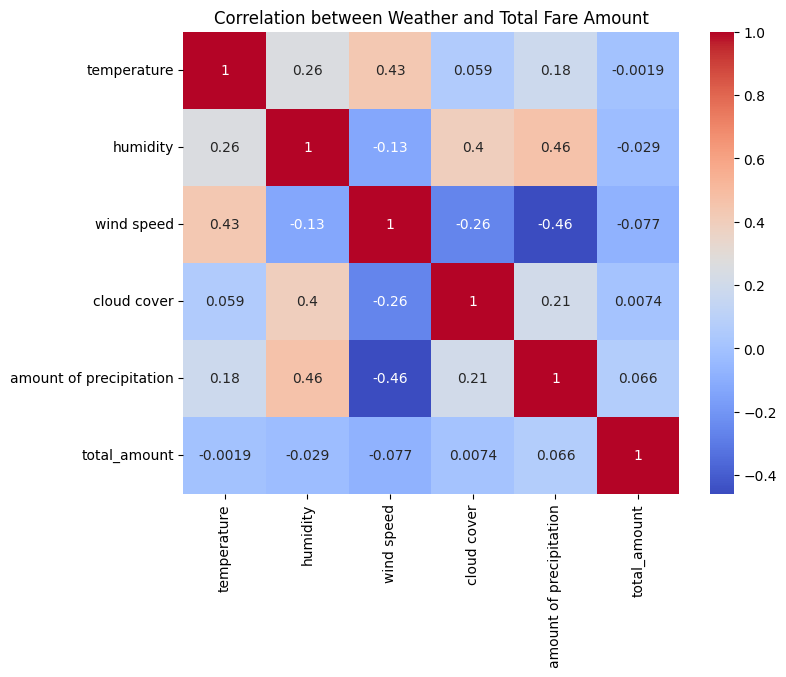

/tmp/ipython-input-2255373816.py:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_fare = data.groupby('temp_range')['total_amount'].mean().reset_index()
/tmp/ipython-input-2255373816.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='temp_range', y='total_amount', data=temp_fare, palette='viridis')


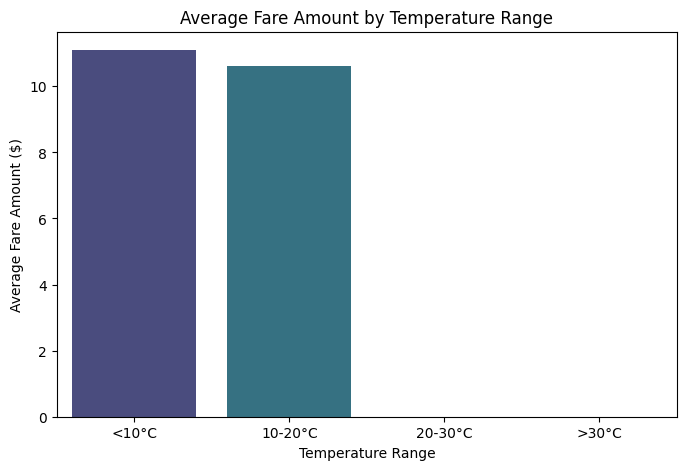

In [73]:
# Derive new columns
data['trip_duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 60
data['fare_per_mile'] = np.where(data['trip_distance'] > 0, data['total_amount'] / data['trip_distance'], np.nan)

# Remove invalid or negative values
data = data[(data['trip_distance'] > 0) & (data['total_amount'] > 0)]
data = data[data['trip_duration'] > 0]  # Remove trips with non-positive duration

# Remove outliers using IQR
numerical_columns = ['trip_distance', 'total_amount', 'fare_per_mile', 'trip_duration']
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Handle weather outliers (e.g., unrealistic temperature or humidity)
data = data[(data['temperature'] >= -30) & (data['temperature'] <= 50)]
data = data[(data['humidity'] >= 0) & (data['humidity'] <= 100)]

# Categorize transaction hour into periods of the day
def categorize_hour(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

data['time_period'] = data['transaction_hour'].apply(categorize_hour)

# Visualizations
plt.figure(figsize=(10, 6))
sns.lineplot(x="temperature", y="total_amount", data=data, ci=None)
plt.title("Total Fare Amount vs. Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Total Fare Amount ($)")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x="time_period", y="total_amount", data=data)
plt.title("Fare Amount by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Total Fare Amount ($)")
plt.show()

# Correlation Heatmap
weather_cols = ['temperature', 'humidity', 'wind speed', 'cloud cover', 'amount of precipitation']
correlation = data[weather_cols + ['total_amount']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation between Weather and Total Fare Amount")
plt.show()

# Additional analyses
# Aggregating average fare by temperature ranges
data['temp_range'] = pd.cut(data['temperature'], bins=[-30, 10, 20, 30, 50], labels=["<10°C", "10-20°C", "20-30°C", ">30°C"])
temp_fare = data.groupby('temp_range')['total_amount'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='temp_range', y='total_amount', data=temp_fare, palette='viridis')
plt.title("Average Fare Amount by Temperature Range")
plt.xlabel("Temperature Range")
plt.ylabel("Average Fare Amount ($)")
plt.show()

In [74]:
data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,...,transaction_hour,temperature,humidity,wind speed,cloud cover,amount of precipitation,trip_duration,fare_per_mile,time_period,temp_range
3,2008-12-31 23:22:42,2008-12-31 23:34:33,6,1.43,1,140,162,2,8.30,2008-12-31,...,23,8.3,52.0,12.0,0.3,0.262963,11.850000,5.804196,Night,<10°C
9,2009-01-01 02:05:26,2009-01-01 02:13:23,1,1.30,1,239,238,2,8.30,2009-01-01,...,2,8.3,52.0,12.0,0.3,0.262963,7.950000,6.384615,Night,<10°C
22,2018-12-30 20:56:32,2018-12-30 21:13:11,2,5.42,1,234,87,1,22.30,2018-12-30,...,20,-0.6,59.0,2.0,0.7,0.100000,16.650000,4.114391,Evening,<10°C
25,2018-12-30 21:22:17,2018-12-30 21:40:45,2,3.06,1,161,263,1,18.36,2018-12-30,...,21,-0.6,59.0,2.0,0.7,0.100000,18.466667,6.000000,Night,<10°C
27,2018-12-30 21:07:02,2018-12-30 21:14:23,2,1.37,1,164,79,2,8.80,2018-12-30,...,21,-0.6,59.0,2.0,0.7,0.100000,7.350000,6.423358,Night,<10°C


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [76]:
data.head(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,...,transaction_hour,temperature,humidity,wind speed,cloud cover,amount of precipitation,trip_duration,fare_per_mile,time_period,temp_range
3,2008-12-31 23:22:42,2008-12-31 23:34:33,6,1.43,1,140,162,2,8.30,2008-12-31,...,23,8.3,52.0,12.0,0.3,0.262963,11.850000,5.804196,Night,<10°C
9,2009-01-01 02:05:26,2009-01-01 02:13:23,1,1.30,1,239,238,2,8.30,2009-01-01,...,2,8.3,52.0,12.0,0.3,0.262963,7.950000,6.384615,Night,<10°C
22,2018-12-30 20:56:32,2018-12-30 21:13:11,2,5.42,1,234,87,1,22.30,2018-12-30,...,20,-0.6,59.0,2.0,0.7,0.100000,16.650000,4.114391,Evening,<10°C
25,2018-12-30 21:22:17,2018-12-30 21:40:45,2,3.06,1,161,263,1,18.36,2018-12-30,...,21,-0.6,59.0,2.0,0.7,0.100000,18.466667,6.000000,Night,<10°C
27,2018-12-30 21:07:02,2018-12-30 21:14:23,2,1.37,1,164,79,2,8.80,2018-12-30,...,21,-0.6,59.0,2.0,0.7,0.100000,7.350000,6.423358,Night,<10°C
28,2018-12-30 21:15:58,2018-12-30 21:24:15,2,1.61,1,79,137,1,10.30,2018-12-30,...,21,-0.6,59.0,2.0,0.7,0.100000,8.283333,6.397516,Night,<10°C
29,2018-12-30 21:29:33,2018-12-30 21:37:52,2,2.75,1,170,263,1,12.96,2018-12-30,...,21,-0.6,59.0,2.0,0.7,0.100000,8.316667,4.712727,Night,<10°C
31,2018-12-31 12:50:25,2018-12-31 13:11:34,1,3.15,1,48,140,1,19.56,2018-12-31,...,12,-0.6,59.0,2.0,0.7,0.100000,21.150000,6.209524,Afternoon,<10°C
32,2018-12-31 13:12:28,2018-12-31 13:18:01,5,0.83,1,243,243,2,6.80,2018-12-31,...,13,6.1,76.0,3.0,1.0,0.100000,5.550000,8.192771,Afternoon,<10°C
33,2018-12-31 13:24:32,2018-12-31 13:37:24,1,3.85,1,263,168,2,14.80,2018-12-31,...,13,6.1,76.0,3.0,1.0,0.100000,12.866667,3.844156,Afternoon,<10°C


In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# # Creating the dataset from the provided table
# data = pd.DataFrame({
#     'trip_distance': [5.42, 7.20, 3.06, 1.37, 1.61],
#     'total_amount': [22.30, 22.80, 18.36, 8.80, 10.30],
#     'payment_type': [1.0, 2.0, 1.0, 2.0, 1.0]  # Target variable
# })

# Feature Engineering
data['fare_per_mile'] = data['total_amount'] / (data['trip_distance'] + 1)
data['log_trip_distance'] = np.log(data['trip_distance'] + 1)
data['log_total_amount'] = np.log(data['total_amount'] + 1)

# Define features and target
X = data[['trip_distance', 'total_amount', 'fare_per_mile', 'log_trip_distance', 'log_total_amount']]
y = data['payment_type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print results
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)


Model Accuracy: 0.87

Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.84      0.89     99912
           2       0.76      0.92      0.83     54976
           3       0.39      0.02      0.05       526
           4       0.07      0.00      0.01       205

    accuracy                           0.87    155619
   macro avg       0.54      0.45      0.45    155619
weighted avg       0.88      0.87      0.87    155619



/tmp/ipython-input-471091726.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


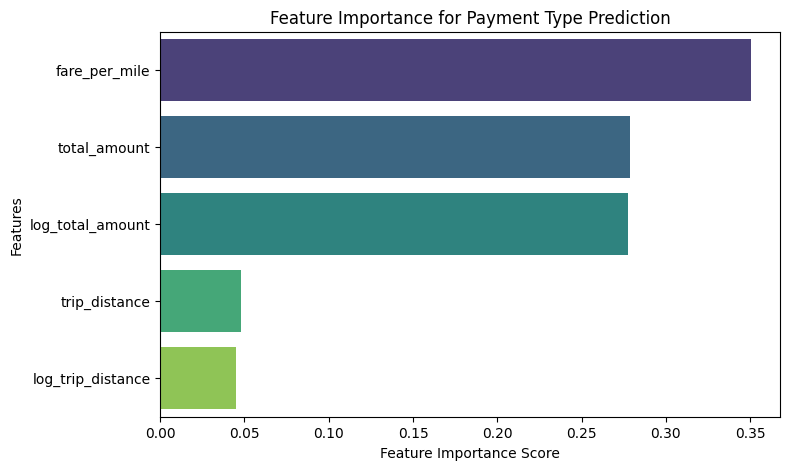

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
feature_importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for Payment Type Prediction")
plt.show()


In [79]:
# Function to predict payment_type based on user input
def predict_payment_type(trip_distance, total_amount):
    # Feature Engineering
    fare_per_mile = total_amount / (trip_distance + 1)
    log_trip_distance = np.log(trip_distance + 1)
    log_total_amount = np.log(total_amount + 1)

    # Create a DataFrame for the new input
    input_data = pd.DataFrame([[trip_distance, total_amount, fare_per_mile, log_trip_distance, log_total_amount]],
                              columns=['trip_distance', 'total_amount', 'fare_per_mile', 'log_trip_distance', 'log_total_amount'])

    # Scale input data
    input_scaled = scaler.transform(input_data)

    # Predict payment_type
    predicted_payment = model.predict(input_scaled)

    return int(predicted_payment[0])  # Convert NumPy value to int for readability

# Example usage:
trip_distance = float(input("Enter trip distance (miles): "))
total_amount = float(input("Enter total amount ($): "))

predicted_type = predict_payment_type(trip_distance, total_amount)
print(f"Predicted Payment Type: {predicted_type}")


Enter trip distance (miles): 2.8
Enter total amount ($): 1200
Predicted Payment Type: 1


Linear Regression - R² Score: 0.97
Linear Regression - Mean Absolute Error: $0.43

Random Forest - R² Score: 1.00
Random Forest - Mean Absolute Error: $0.00


/tmp/ipython-input-2998417069.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


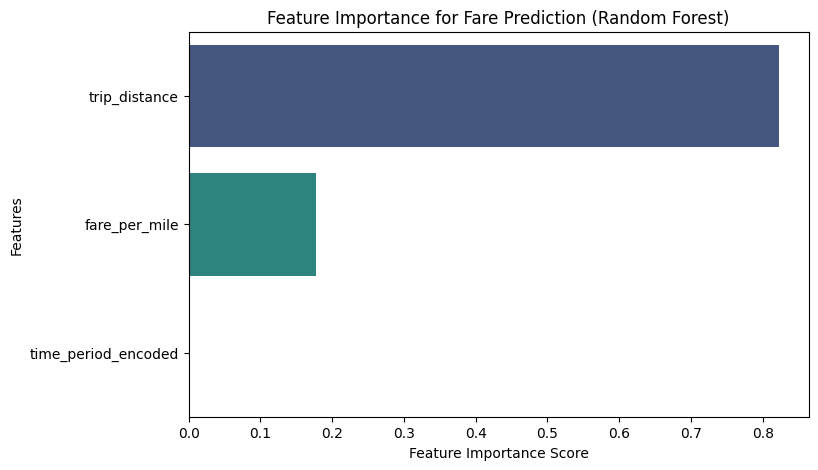

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

#  Creating the dataset from the provided table
# data = pd.DataFrame({
#     'trip_distance;',
#     'total_amount',
#     'time_period'
# })

# Feature Engineering
data['fare_per_mile'] = data['total_amount'] / (data['trip_distance'] + 1)

# Ordinal Encoding for time_period
time_mapping = {'Morning': 1, 'Afternoon': 2, 'Evening': 3, 'Night': 4}
data['time_period_encoded'] = data['time_period'].map(time_mapping)

# Define features (X) and target (y)
X = data[['trip_distance', 'fare_per_mile', 'time_period_encoded']]
y = data['total_amount']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **1. Linear Regression Model**
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions & Evaluation for Linear Regression
y_pred_lr = lr_model.predict(X_test_scaled)
r2_lr = r2_score(y_test, y_pred_lr)
# accuracy = accuracy_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
# print(f"Linear Regression Model Accuracy: {accuracy:.2f}")
print(f"Linear Regression - R² Score: {r2_lr:.2f}")
print(f"Linear Regression - Mean Absolute Error: ${mae_lr:.2f}")

### **2. Random Forest Model**
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions & Evaluation for Random Forest
y_pred_rf = rf_model.predict(X_test_scaled)
#accuracy = accuracy_score(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"\nRandom Forest - R² Score: {r2_rf:.2f}")
print(f"Random Forest - Mean Absolute Error: ${mae_rf:.2f}")

# Feature Importance (Only for Random Forest)
feature_importances = rf_model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for Fare Prediction (Random Forest)")
plt.show()

In [82]:
import gradio as gr
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Creating the dataset
data = pd.DataFrame({
    'trip_distance': [5.42, 7.20, 3.06, 1.37, 1.61],
    'total_amount': [22.30, 22.80, 18.36, 8.80, 10.30],
    'payment_type': [1.0, 2.0, 1.0, 2.0, 1.0]  # Target variable
})

# Feature Engineering
data['fare_per_mile'] = data['total_amount'] / (data['trip_distance'] + 1)
data['log_trip_distance'] = np.log(data['trip_distance'] + 1)
data['log_total_amount'] = np.log(data['total_amount'] + 1)

# Define features and target
X = data[['trip_distance', 'total_amount', 'fare_per_mile', 'log_trip_distance', 'log_total_amount']]
y = data['payment_type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

def predict_payment(trip_distance, total_amount):
    # Feature Engineering on input
    fare_per_mile = total_amount / (trip_distance + 1)
    log_trip_distance = np.log(trip_distance + 1)
    log_total_amount = np.log(total_amount + 1)

    # Prepare input features
    input_data = np.array([[trip_distance, total_amount, fare_per_mile, log_trip_distance, log_total_amount]])
    input_scaled = scaler.transform(input_data)

    # Prediction
    prediction = model.predict(input_scaled)[0]
    return f"Predicted Payment Type: {int(prediction)}"

# Gradio Interface
iface = gr.Interface(
    fn=predict_payment,
    inputs=[
        gr.Number(label="Trip Distance"),
        gr.Number(label="Total Amount")
    ],
    outputs=gr.Textbox(label="Prediction"),
    title="Payment Type Prediction",
    description="Enter trip details to predict the payment type (1: Cash, 2: Card)."
)

if __name__ == "__main__":
    iface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fcbfa3661eb75e3296.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [83]:
!pip install gradio

<Axes: >

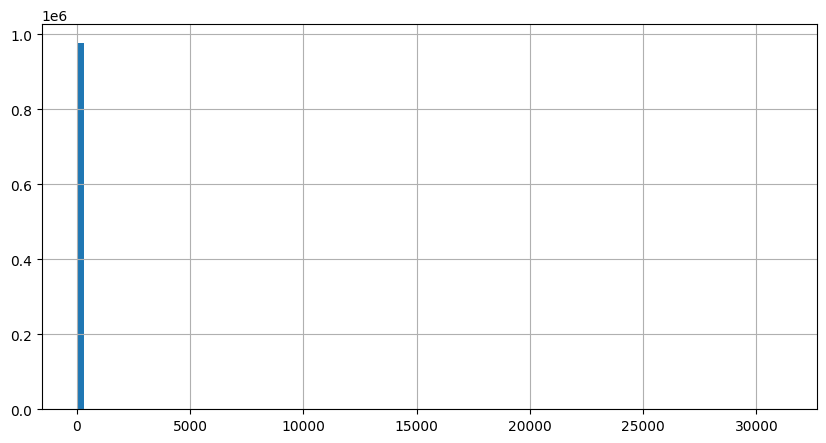

In [84]:
nyc_taxi_with_weather['total_amount'].hist(bins=100, figsize=(10,5))

In [85]:
nyc_class = nyc_taxi_with_weather.copy()
nyc_class['earning_class'] = nyc_taxi_with_weather['total_amount'].apply(lambda x: 'low' if x<=15 else 'high')
nyc_class['earning_class_binary'] = nyc_class['earning_class'].apply(lambda x: 0 if x=='low' else 1)
nyc_class.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,...,transaction_hour,temperature,humidity,wind speed,cloud cover,amount of precipitation,trip_duration,fare_per_mile,earning_class,earning_class_binary
0,2003-01-01 00:05:12,2003-01-01 00:05:12,1,0.00,1,264,193,2,0.00,2003-01-01,...,0,8.3,52.0,12.0,0.3,0.262963,0.000000,NaN,low,0
1,2003-01-01 00:15:01,2003-01-01 00:15:05,6,0.00,1,264,193,2,0.00,2003-01-01,...,0,8.3,52.0,12.0,0.3,0.262963,0.066667,NaN,low,0
2,2008-12-31 23:22:32,2009-01-01 00:06:39,1,20.67,2,132,239,2,58.56,2008-12-31,...,23,8.3,52.0,12.0,0.3,0.262963,44.116667,2.833091,high,1
3,2008-12-31 23:22:42,2008-12-31 23:34:33,6,1.43,1,140,162,2,8.30,2008-12-31,...,23,8.3,52.0,12.0,0.3,0.262963,11.850000,5.804196,low,0
4,2008-12-31 23:41:30,2009-01-01 00:12:00,6,4.64,1,233,141,2,23.30,2008-12-31,...,23,8.3,52.0,12.0,0.3,0.262963,30.500000,5.021552,high,1


In [86]:
nyc_class['earning_class'].value_counts()

,count
earning_class,
low,686672
high,290735
